In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("Titanic_train.csv")

print("First 5 rows:")
display(train_df.head())

print("\nInfo about dataset:")
train_df.info()

print("\nSummary statistics:")
display(train_df.describe(include='all'))


First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


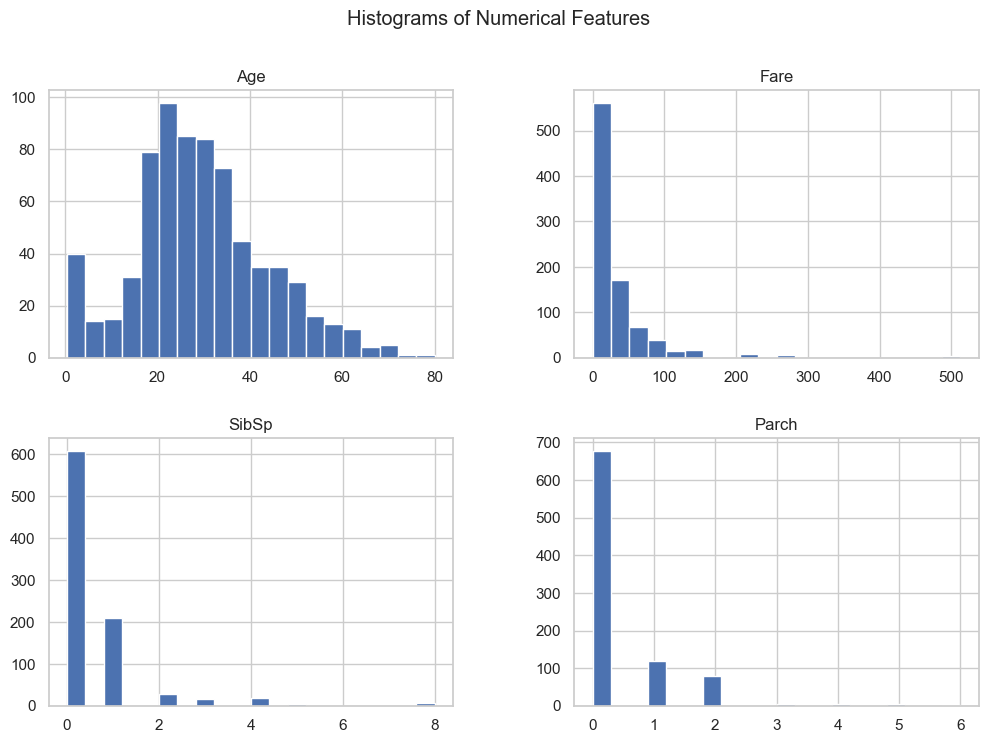

In [2]:
sns.set(style="whitegrid")

# Histogram
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
train_df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()


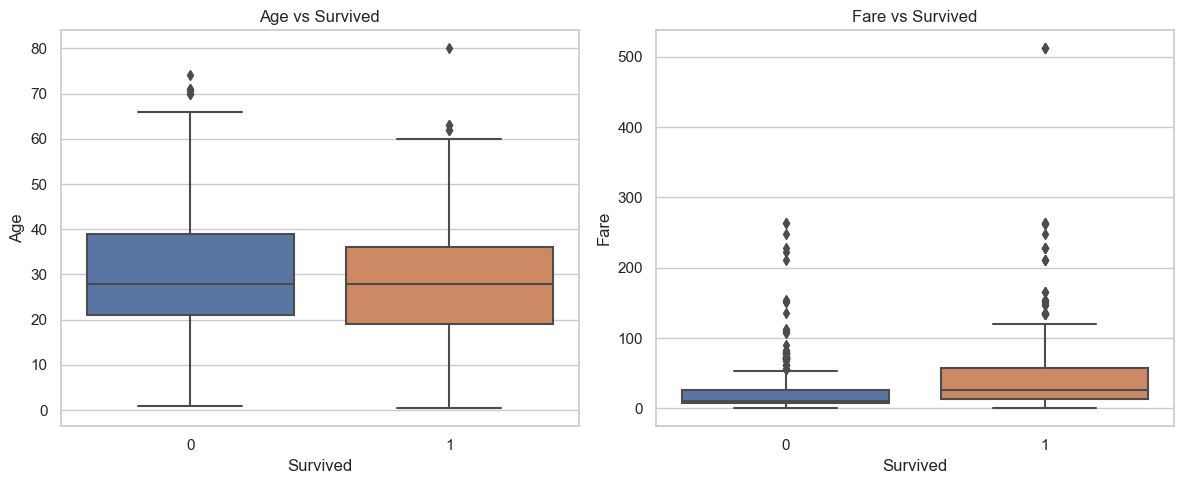

In [4]:
# Box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age vs Survived')
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare vs Survived')
plt.tight_layout()
plt.show()


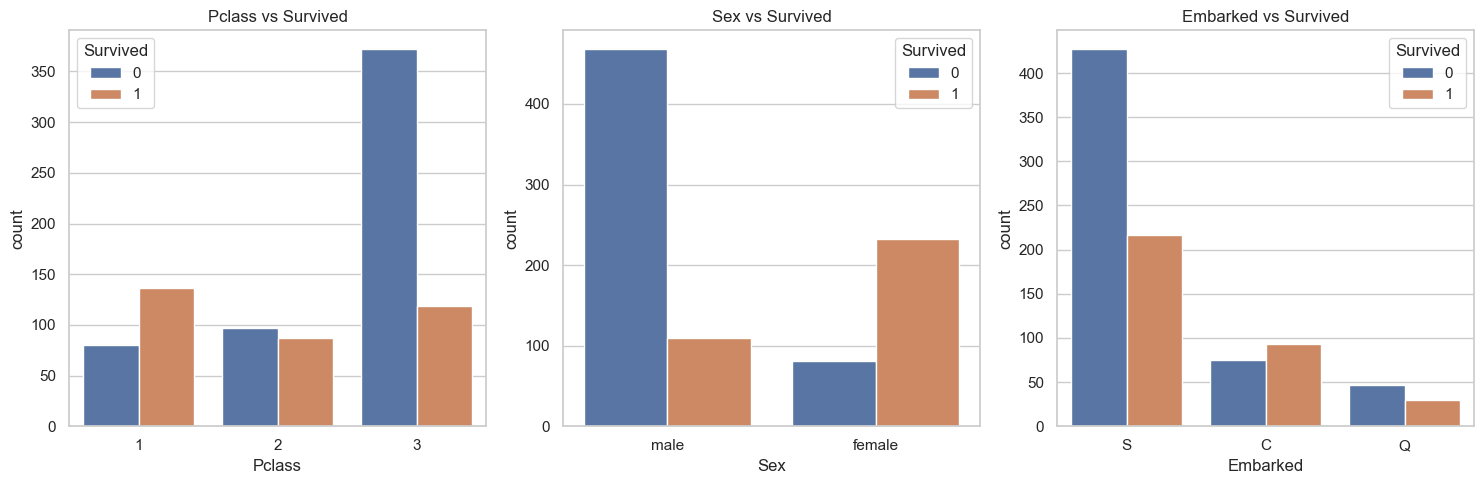

In [6]:
plt.figure(figsize=(15, 5))
categorical_features = ['Pclass', 'Sex', 'Embarked']
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, hue=train_df['Survived'].astype(str), data=train_df)
    plt.title(f'{col} vs Survived')
plt.tight_layout()
plt.show()



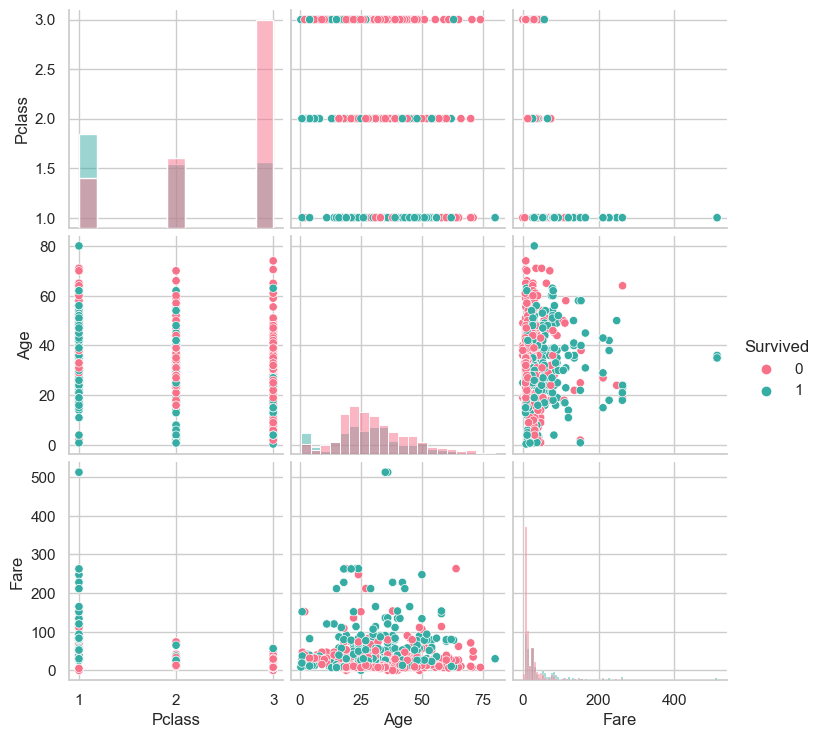

In [7]:
# Pair plot 
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
sns.pairplot(train_df[selected_features].dropna(), hue='Survived', palette='husl', diag_kind='hist')
plt.show()


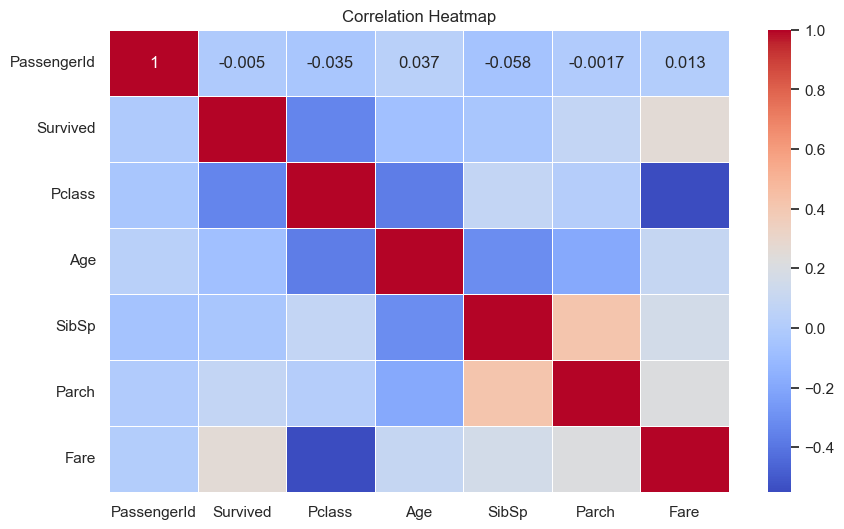

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
#Finding missing values

train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [13]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [15]:
# One-hot encode 'Embarked'
embarked_dummies = pd.get_dummies(train_df['Embarked'], prefix='Embarked')
train_df = pd.concat([train_df, embarked_dummies], axis=1)
train_df.drop('Embarked', axis=1, inplace=True)


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(3)
memory usage: 72.3+ KB


In [31]:
X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = train_df['Survived']


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

x= train_df.drop('Survived', axis=1)
y= train_df['Survived']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = log_model.predict(X_test)

y_prob = log_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


Accuracy:  0.8101
Precision: 0.7857
Recall:    0.7432
F1 Score:  0.7639
ROC AUC:   0.8826


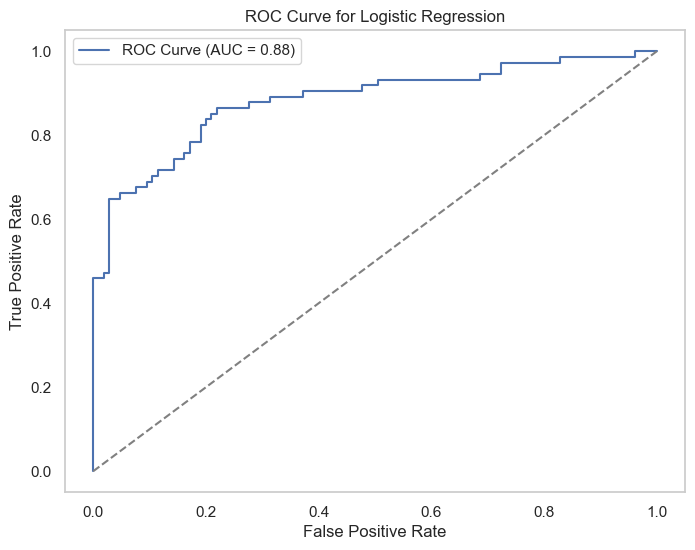

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()


In [38]:
import numpy as np
import pandas as pd


coef = log_model.coef_[0]  
features = X_train.columns 


coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef,
    'Odds Ratio': np.exp(coef)
}).sort_values(by='Odds Ratio', ascending=False)

print(coef_df)


      Feature  Coefficient  Odds Ratio
1         Sex     2.592870   13.368085
6  Embarked_C     0.191170    1.210665
7  Embarked_Q     0.041616    1.042494
5        Fare     0.002544    1.002548
2         Age    -0.030530    0.969932
4       Parch    -0.109663    0.896136
8  Embarked_S    -0.228889    0.795417
3       SibSp    -0.294133    0.745178
0      Pclass    -0.936415    0.392031


# Discussing Significance of Features

High positive odds ratio: Feature strongly increases survival chances. For example, if Sex (encoded as 0=female, 1=male) has a negative coefficient, it means females had higher survival odds.

High negative odds ratio: Feature strongly decreases survival chances, e.g., higher Pclass (passenger class, with 1 = 1st class, 3 = 3rd class) might lower survival probability.

Features with coefficients near zero have little effect on survival prediction.

Statistical significance of coefficients (p-values) is not directly available in scikit-learn logistic regression, but you can use statsmodels for that if you want detailed inference.

#### Example insights:

Sex: Typically one of the strongest predictors; females had much higher survival odds.

Pclass: 1st class passengers had better survival chances than 3rd class.

Age: Younger passengers may have better odds.

Fare: Higher fare might correlate with higher class and better survival odds.

SibSp or Parch: Family size effect on survival.

In [39]:
import joblib

# Save model
joblib.dump(log_model, 'logistic_model.pkl')


['logistic_model.pkl']

In [40]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib


model = joblib.load('logistic_model.pkl')

st.title("Titanic Survival Prediction")


pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
sex = st.selectbox("Sex", ["female", "male"])
age = st.slider("Age", 0, 100, 30)
sibsp = st.number_input("Number of siblings/spouses aboard", 0, 8, 0)
parch = st.number_input("Number of parents/children aboard", 0, 6, 0)
fare = st.number_input("Fare", 0.0, 600.0, 32.2)


sex_encoded = 0 if sex == "female" else 1


input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex_encoded],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked_Q': [0],
    'Embarked_S': [1],  
})

if st.button("Predict Survival"):
    prediction = model.predict(input_data)[0]
    prediction_proba = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.success(f"Passenger is likely to **Survive** with probability {prediction_proba:.2f}")
    else:
        st.error(f"Passenger is likely to **Not Survive** with probability {1-prediction_proba:.2f}")


2025-05-29 07:45:07.076 
  command:

    streamlit run C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [42]:
import os
os.getcwd()

'C:\\Users\\Manisha Chandanshiv'

# Running this code in cmd

cd C:\Users\Manisha Chandanshiv

streamlit run app.py

Accuracy:  0.8101
Precision: 0.7857
Recall:    0.7432
F1 Score:  0.7639
ROC AUC:   0.8826


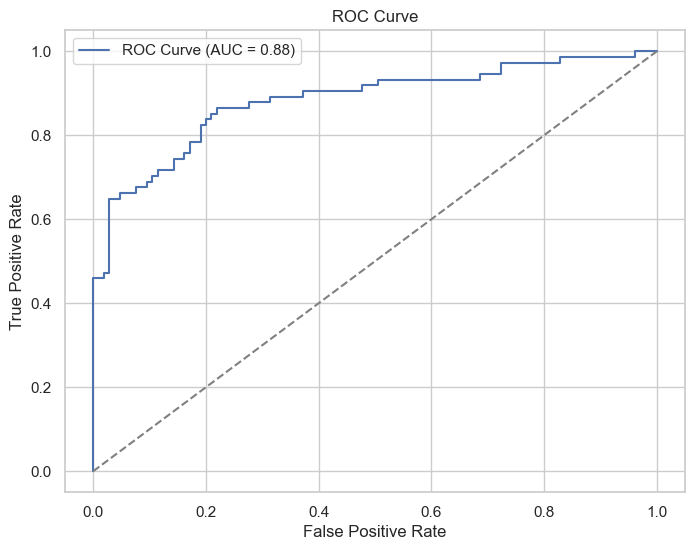

In [43]:
#Model Evaluation on Test Data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]  


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [44]:
import streamlit as st
import pickle
import numpy as np


with open('logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Titanic Survival Prediction")


pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.number_input("Age", min_value=0, max_value=100, value=30)
sibsp = st.number_input("Number of siblings/spouses aboard", min_value=0, max_value=10, value=0)
parch = st.number_input("Number of parents/children aboard", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, value=32.0)

embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])


sex_val = 1 if sex == "male" else 0
embarked_C = 1 if embarked == "C" else 0
embarked_Q = 1 if embarked == "Q" else 0
embarked_S = 1 if embarked == "S" else 0


features = np.array([[pclass, sex_val, age, sibsp, parch, fare, embarked_C, embarked_Q, embarked_S]])

if st.button("Predict Survival"):
    prediction = model.predict(features)
    proba = model.predict_proba(features)[0][1]

    if prediction[0] == 1:
        st.success(f"The passenger is likely to survive with probability {proba:.2f}")
    else:
        st.error(f"The passenger is unlikely to survive with probability {1 - proba:.2f}")


In [45]:
import pickle


with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(log_model, f)


# Running this in cmd

streamlit run app.py
